In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")


In [3]:
le = LabelEncoder()

df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])


In [4]:
df['final_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


In [5]:
np.random.seed(42)
df['study_hours'] = np.random.randint(1, 10, size=len(df))
df['sleep_hours'] = np.random.randint(4, 9, size=len(df))
df['attendance'] = np.random.randint(60, 100, size=len(df))

X = df[['study_hours', 'attendance', 'parental level of education',
        'test preparation course', 'sleep_hours']]
y = df['final_score']


In [6]:
X = X.fillna(X.mean())


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 207.96349904928692
RMSE: 14.420939603551737
R2 Score: 0.029869712040200502


In [12]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff_df)


                       Feature  Coefficient
0                  study_hours    -0.156534
1                   attendance     0.089250
2  parental level of education    -1.001782
3      test preparation course    -3.831234
4                  sleep_hours     0.139114


In [13]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

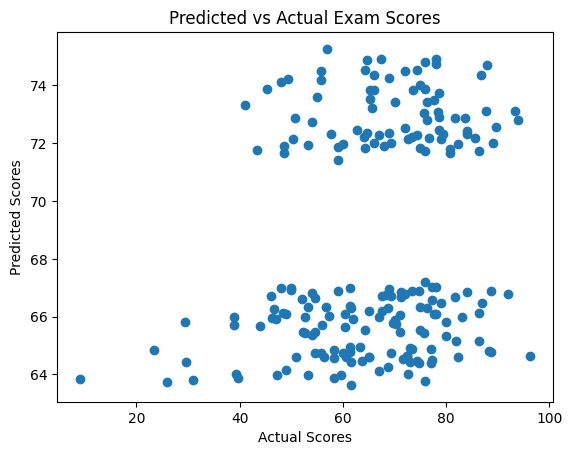

In [15]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Exam Scores")
plt.show()


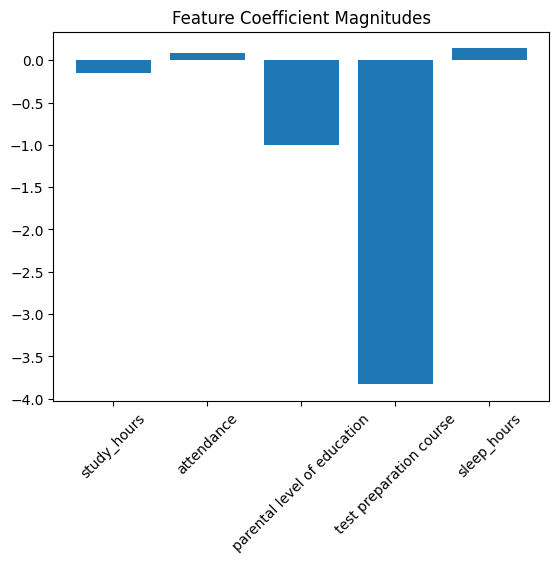

In [16]:
plt.figure()
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xticks(rotation=45)
plt.title("Feature Coefficient Magnitudes")
plt.show()


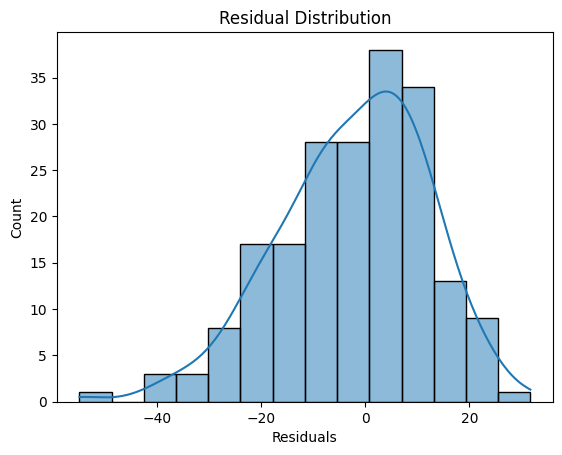

In [17]:
residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()
